# 프로젝트 : 다양한 OCR모델 비교하기

### <목차>
#### Step1. 검증용 데이터셋 준비
#### Step2. Model 별 테스트
    (1) keras-ocr
    (2) Tesseract
#### Step3. 테스트 결과 정리
#### Step4. 결과 분석과 결론 제시
#### 🤔회고🤔
#### Reference

***
# Step1. 검증용 데이터셋 준비
- 테스트용 이미지는 최대 20장으로만 사용
- 이미지는 url을 이용할 것이며, [unsplash](https://unsplash.com/s/photos/text) 에서 가져온다.

In [1]:
# 라이브러리 버전 확인
import keras_ocr
import pytesseract
import matplotlib.pyplot as plt

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


In [2]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [3]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4',
  'https://source.unsplash.com/kGa56RzfbIM',
  'https://source.unsplash.com/78iLIC2FUdA/640x460',
  'https://source.unsplash.com/039N80FUbVQ/640x460',
  'https://source.unsplash.com/M-fstJQY4Ok', 
  'https://source.unsplash.com/v4yeBEodrFk',
  'https://source.unsplash.com/wJw9UGSZLGE',
  'https://source.unsplash.com/tg7xChYyE08'
    
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

In [10]:
image_urls

['https://source.unsplash.com/M7mu6jXlcns/640x460',
 'https://source.unsplash.com/6jsp4iHc8hI/640x460',
 'https://source.unsplash.com/98uYQ-KupiE',
 'https://source.unsplash.com/j9JoYpaJH3A',
 'https://source.unsplash.com/eBkEJ9cH5b4',
 'https://source.unsplash.com/kGa56RzfbIM',
 'https://source.unsplash.com/78iLIC2FUdA/640x460',
 'https://source.unsplash.com/039N80FUbVQ/640x460',
 'https://source.unsplash.com/M-fstJQY4Ok',
 'https://source.unsplash.com/v4yeBEodrFk',
 'https://source.unsplash.com/wJw9UGSZLGE',
 'https://source.unsplash.com/tg7xChYyE08']

In [14]:
import urllib.request
url = 'https://source.unsplash.com/M7mu6jXlcns/640x460'
urllib.request.urlretrieve(url, 'test.jpg')

('test.jpg', <http.client.HTTPMessage at 0x7f8f68224e20>)

In [15]:
import urllib.request
url = 'https://source.unsplash.com/6jsp4iHc8hI/640x460'
urllib.request.urlretrieve(url, 'test02.jpg')

('test02.jpg', <http.client.HTTPMessage at 0x7f8f68224880>)

In [16]:
import urllib.request
url = 'https://source.unsplash.com/98uYQ-KupiE'
urllib.request.urlretrieve(url, 'test03.jpg')

('test03.jpg', <http.client.HTTPMessage at 0x7f8f682249a0>)

In [17]:
import urllib.request
url = 'https://source.unsplash.com/j9JoYpaJH3A'
urllib.request.urlretrieve(url, 'test04.jpg')

('test04.jpg', <http.client.HTTPMessage at 0x7f8f682248e0>)

In [18]:
import urllib.request
url = 'https://source.unsplash.com/eBkEJ9cH5b4'
urllib.request.urlretrieve(url, 'test05.jpg')

('test05.jpg', <http.client.HTTPMessage at 0x7f8f68224580>)

In [19]:
import urllib.request
url = 'https://source.unsplash.com/kGa56RzfbIM'
urllib.request.urlretrieve(url, 'test06.jpg')

('test06.jpg', <http.client.HTTPMessage at 0x7f8f68224790>)

In [20]:
import urllib.request
url = 'https://source.unsplash.com/78iLIC2FUdA/640x460'
urllib.request.urlretrieve(url, 'test07.jpg')

('test07.jpg', <http.client.HTTPMessage at 0x7f8f682247c0>)

In [21]:
import urllib.request
url = 'https://source.unsplash.com/039N80FUbVQ/640x460'
urllib.request.urlretrieve(url, 'test08.jpg')

('test08.jpg', <http.client.HTTPMessage at 0x7f8f68224d30>)

In [22]:
import urllib.request
url = 'https://source.unsplash.com/M-fstJQY4Ok'
urllib.request.urlretrieve(url, 'test09.jpg')

('test09.jpg', <http.client.HTTPMessage at 0x7f8f68224e80>)

In [25]:
import urllib.request
url = 'https://source.unsplash.com/v4yeBEodrFk'
urllib.request.urlretrieve(url, 'test10.jpg')

('test10.jpg', <http.client.HTTPMessage at 0x7f8f682248b0>)

In [23]:
import urllib.request
url = 'https://source.unsplash.com/wJw9UGSZLGE'
urllib.request.urlretrieve(url, 'test11.jpg')

('test11.jpg', <http.client.HTTPMessage at 0x7f8f682249d0>)

In [24]:
import urllib.request
url = 'https://source.unsplash.com/tg7xChYyE08'
urllib.request.urlretrieve(url, 'test12.jpg')

('test12.jpg', <http.client.HTTPMessage at 0x7f8f68224dc0>)

In [27]:
import os
import glob

data_path = os.getenv('HOME')+'/aiffel/ocr_python/Untitled Folder/'
images_path = glob.glob(data_path+"*.jpg")
images_path

['/aiffel/aiffel/ocr_python/Untitled Folder/test03.jpg',
 '/aiffel/aiffel/ocr_python/Untitled Folder/test02.jpg',
 '/aiffel/aiffel/ocr_python/Untitled Folder/test06.jpg',
 '/aiffel/aiffel/ocr_python/Untitled Folder/test08.jpg',
 '/aiffel/aiffel/ocr_python/Untitled Folder/test05.jpg',
 '/aiffel/aiffel/ocr_python/Untitled Folder/test10.jpg',
 '/aiffel/aiffel/ocr_python/Untitled Folder/test07.jpg',
 '/aiffel/aiffel/ocr_python/Untitled Folder/test09.jpg',
 '/aiffel/aiffel/ocr_python/Untitled Folder/test04.jpg',
 '/aiffel/aiffel/ocr_python/Untitled Folder/test11.jpg',
 '/aiffel/aiffel/ocr_python/Untitled Folder/test12.jpg',
 '/aiffel/aiffel/ocr_python/Untitled Folder/test.jpg']

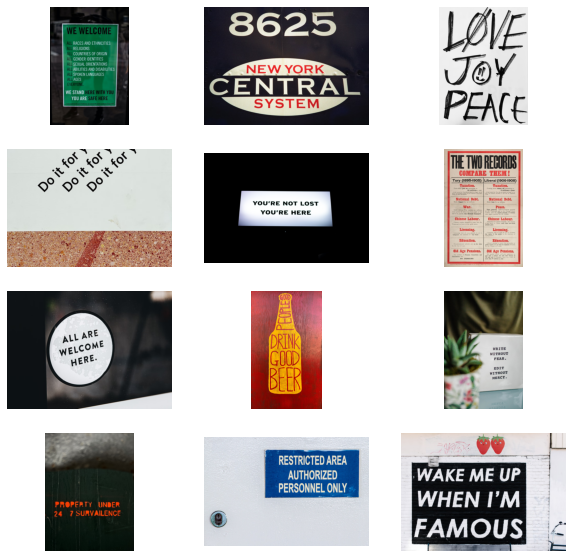

In [28]:
plt.figure(figsize=(10, 10))

for i, image in enumerate(images_path,1):
    plt.subplot(4, 3, i)
    plt.imshow(img.imread(image))
    plt.axis('off')

# Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

## (1) keras-ocr

- keras_ocr.pipeline.Pipeline() : 인식을 위한 파이프라인을 생성하는데 이때 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러오게 됨

In [30]:
images = [ keras_ocr.tools.read(images) for images in images_path]
prediction_groups = [pipeline.recognize([images]) for images in images_path]

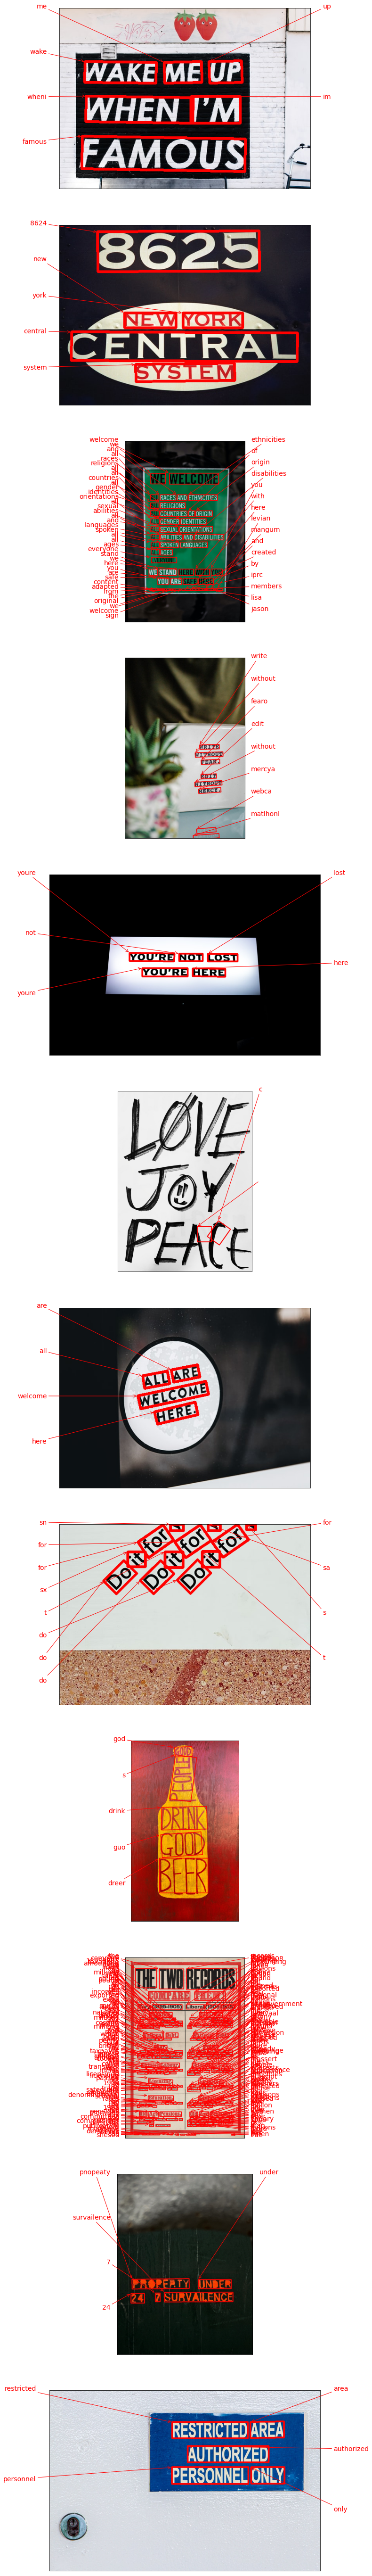

In [4]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(100, 100))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## (2) Tesseract
-  crop_word_regions() 함수 : 여러분이 선택한 테스트 이미지를 받아서, 문자 검출을 진행한 후, 검출된 문자 영역을 crop한 이미지로 만들어 그 파일들의 list를 리턴하는 함수
-  image_to_string() :  검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결괏값으로 도출됨

In [5]:
pip list | grep pytesseract

pytesseract                   0.3.8
Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test_image.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png


In [7]:
# 이미지에서 단어 인식하기
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)


|



Zs

AUTHORIZED



a

8

:

Be

F

k



I

4

@

Done


## (3) Google OCR API

In [31]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    BASE_DIR = 'private'
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=os.path.join(BASE_DIR,"ssamko-service-f********6.json")
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    text_list = list(map(lambda x: x.description, texts))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

    return text_list

In [8]:
def detect_text(path):
    """Detects text in the file."""
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    only_text_list = []
    vertices_tuple_list = []
    for text in texts:
       print('\n"{}"'.format(text.description))
       only_text_list.append(text.description)

       vertices = (['({},{})'.format(vertex.x, vertex.y)
                  for vertex in text.bounding_poly.vertices])
    
       vertices_tuple = [(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices]
       vertices_tuple_list.append(vertices_tuple)

       print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
    
    return only_text_list, vertices_tuple_list

In [ ]:
google_ocr_dict = {}
for img_path, img_file in zip(img_path_list, img_file_list):
    print(f'---------------{img_file}---------------')
    texts, vertices_list = detect_text(images_path)
    google_ocr_dict[img_path] = {'texts': texts, 'images_path': images_path}

In [9]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [ ]:
def draw_boxes(image, bounds, color):
    """Draw a border around the image using the hints in the vector list."""
    draw = ImageDraw.Draw(image)

    for bound in bounds:
        draw.polygon([
            bound.vertices[0].x, bound.vertices[0].y,
            bound.vertices[1].x, bound.vertices[1].y,
            bound.vertices[2].x, bound.vertices[2].y,
            bound.vertices[3].x, bound.vertices[3].y], None, color)
    return image

In [38]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/client_secret_378368834712-rahgrh7fue01ov80mdjgvj7p8grgdmie.apps.googleusercontent.com.json'


-rw-r--r-- 1 root root 435 Mar  7 01:28 /aiffel/aiffel/ocr_python/client_secret_378368834712-rahgrh7fue01ov80mdjgvj7p8grgdmie.apps.googleusercontent.com.json


In [42]:
# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
# path = os.getenv('HOME')+'/aiffel/ocr_python/Untitled Folder/'
# images_path = glob.glob(data_path+"*.jpg")
# images_path
path = os.getenv('HOME')+'/aiffel/ocr_python/Untitled Folder/test.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

DefaultCredentialsError: File private/ssamko-service-f********6.json was not found.

# Step3. 테스트 결과 정리

# Step4. 결과 분석과 결론 제시

# 🤔회고🤔

|평가문항|상세기준|
|---|---|
|1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?|목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.|
|2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?|평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.|
|3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?|최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.|

- 이건 또 뭐시여....?ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ

/tmp/ipykernel_13/4124900029.py:8: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  plt.imshow(img.imread(image))


SyntaxError: not a PNG file (<string>)

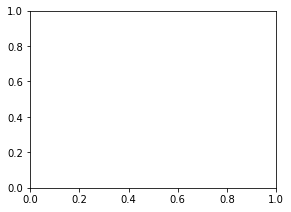

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as img

plt.figure(figsize=(15, 15))

for i, image in enumerate(image_urls,1):
    plt.subplot(4, 3, i)
    plt.imshow(img.imread(image))
    plt.axis('off')

# Reference
1. 